In [32]:
import librosa
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
def extract_mfcc(file_path, n_mfcc=40):
    try:
        audio, sr = librosa.load(file_path, sr=22050)
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
        mfcc_mean = np.mean(mfcc.T, axis=0)
        return mfcc_mean
    except Exception as e:
        print("Error:", file_path)
        return None


In [21]:
AUDIO_DIR = r"F:\Multimodal_Emotion_Detection\data\speech\Audio"

emotions = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

X = []
y = []

for emotion in emotions:
    emotion_path = os.path.join(AUDIO_DIR, emotion)
    for file in os.listdir(emotion_path):
        if file.endswith(".wav"):
            file_path = os.path.join(emotion_path, file)
            mfcc = extract_mfcc(file_path)
            if mfcc is not None:
                X.append(mfcc)
                y.append(emotion)


In [22]:
X = np.array(X)
y = np.array(y)

print(X.shape, y.shape)


(1400, 40) (1400,)


In [23]:

le_audio = LabelEncoder()
y_encoded = le_audio.fit_transform(y)

In [24]:
print(np.unique(y_encoded))
print(le_audio.classes_)

[0 1 2 3 4 5 6]
['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [25]:

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

In [26]:
print(X_train.shape, X_test.shape)

(1120, 40) (280, 40)


In [27]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
y_pred = rf_model.predict(X_test)

print(classification_report(
    y_test,
    y_pred,
    target_names=le_audio.classes_
))


              precision    recall  f1-score   support

       angry       1.00      1.00      1.00        40
     disgust       1.00      1.00      1.00        40
        fear       1.00      1.00      1.00        40
       happy       1.00      0.97      0.99        40
     neutral       1.00      1.00      1.00        40
         sad       1.00      1.00      1.00        40
    surprise       0.98      1.00      0.99        40

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280



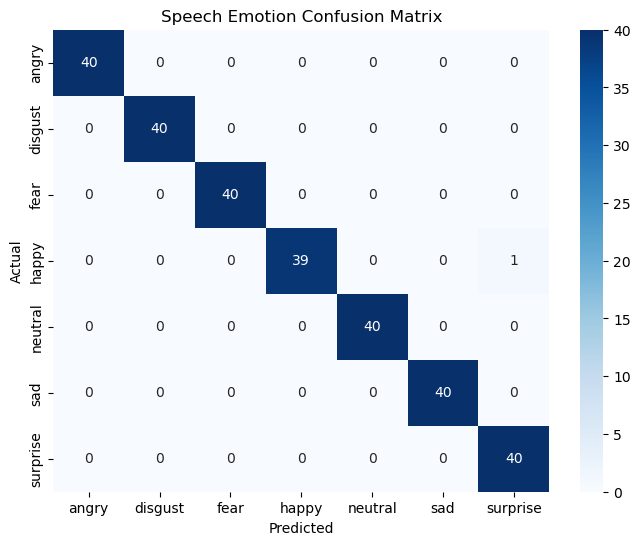

In [29]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=le_audio.classes_,
            yticklabels=le_audio.classes_,
            cmap="Blues")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Speech Emotion Confusion Matrix")
plt.show()


In [31]:
def predict_speech_emotion(audio_path):
    mfcc = extract_mfcc(audio_path)
    mfcc = mfcc.reshape(1, -1)
    pred = rf_model.predict(mfcc)
    return le_audio.inverse_transform(pred)[0]


In [42]:
predict_speech_emotion(r"F:\Multimodal_Emotion_Detection\data\speech\Audio\angry\OAF_base_angry.wav")

np.str_('angry')

In [30]:
import joblib

joblib.dump(rf_model, "speech_emotion_rf.pkl")
joblib.dump(le_audio, "speech_label_encoder.pkl")


['speech_label_encoder.pkl']